# TVAE
Generating synthetic data with TVAE

## Data processing


In [ ]:
import pandas as pd

In [ ]:
transactions = pd.read_csv('https://raw.githubusercontent.com/BigTuna08/Banksformer_ecml_2022/main/czech/banksformer/data/tr_by_acct_w_age.csv',
                            parse_dates=['date'])
transactions.head()

,Unnamed: 0,account_id,date,type,operation,amount,balance,k_symbol,client_id,age,datetime
0,149432,1,1995-03-24,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,1,29,1995-03-24
1,157404,1,1995-04-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,4679.0,NaN,1,29,1995-04-13
2,158832,1,1995-04-23,CREDIT,CREDIT IN CASH,12600.0,17279.0,NaN,1,29,1995-04-23
3,162681,1,1995-04-30,CREDIT,NaN,19.2,17298.2,INTEREST CREDITED,1,29,1995-04-30
4,167083,1,1995-05-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,20977.2,NaN,1,29,1995-05-13


In [ ]:
target_cols = useful_cols = ['account_id', 'date', 'type', 'operation', 'amount', 'k_symbol']
data = transactions[target_cols]
data.loc[data['k_symbol'].isna(), 'k_symbol'] = ""
data.head()

,account_id,date,type,operation,amount,k_symbol
0,1,1995-03-24,CREDIT,CREDIT IN CASH,1000.0,
1,1,1995-04-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,
2,1,1995-04-23,CREDIT,CREDIT IN CASH,12600.0,
3,1,1995-04-30,CREDIT,NaN,19.2,INTEREST CREDITED
4,1,1995-05-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,


In [ ]:
# split date column into month day year
data.loc[:, 'month'] = pd.to_datetime(data['date']).dt.month
data.loc[:, 'day'] = pd.to_datetime(data['date']).dt.day
data.loc[:, 'year'] = pd.to_datetime(data['date']).dt.year
data = data.drop('date', axis=1)
data.head()

<ipython-input-5-63f43d059500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'month'] = pd.to_datetime(data['date']).dt.month
<ipython-input-5-63f43d059500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'day'] = pd.to_datetime(data['date']).dt.day
<ipython-input-5-63f43d059500>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,account_id,type,operation,amount,k_symbol,month,day,year
0,1,CREDIT,CREDIT IN CASH,1000.0,,3,24,1995
1,1,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,,4,13,1995
2,1,CREDIT,CREDIT IN CASH,12600.0,,4,23,1995
3,1,CREDIT,NaN,19.2,INTEREST CREDITED,4,30,1995
4,1,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,,5,13,1995


In [1]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 15.3 MB/s eta 0:00:00


## Metadata

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(data)

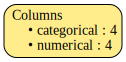

In [ ]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png'
)

In [ ]:
metadata.validate() # good to go if this returns no errors

## TVAE Synthesizer

In [2]:
from sdv.single_table import TVAESynthesizer

In [ ]:
synthesizer = TVAESynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    epochs=500
)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:80: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthesizer.fit(data)

In [ ]:
synthesizer.save(
    filepath='tvae_synthesizer.pkl'
)
!cp tvae_synthesizer.pkl .

In [ ]:
losses = synthesizer.get_loss_values()
losses.to_csv('tvae_losses.csv')
!cp tvae_losses.csv .

## Sampling Data

In [3]:
synthesizer = TVAESynthesizer.load(
    filepath='tvae_synthesizer.pkl'
)

In [4]:
synthetic_data = synthesizer.sample(1000000)
synthetic_data.head()

,account_id,type,operation,amount,k_symbol,month,day,year
0,3988,CREDIT,CREDIT IN CASH,6852.1,,12,10,1998
1,756,DEBIT,CASH WITHDRAWAL,23479.7,,8,20,1998
2,3843,DEBIT,REMITTANCE TO ANOTHER BANK,1598.4,HOUSEHOLD,12,5,1998
3,5136,CREDIT,CREDIT IN CASH,2000.5,,8,18,1997
4,4127,DEBIT,CREDIT CARD WITHDRAWAL,324.3,,12,20,1998


In [5]:
synthetic_data.to_csv("TVAE_500Epochs.csv")

In [6]:
synthetic_data['account_id'].nunique()

11378

In [7]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   account_id  1000000 non-null  int64  
 1   type        1000000 non-null  object 
 2   operation   843343 non-null   object 
 3   amount      1000000 non-null  float64
 4   k_symbol    1000000 non-null  object 
 5   month       1000000 non-null  int64  
 6   day         1000000 non-null  int64  
 7   year        1000000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 61.0+ MB
